# Heuristic performance

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import ast

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import gridspec

In [3]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['legend.fontsize'] = 12

In [4]:
pd.set_option('display.max_rows', None)  # display all rows.
pd.set_option('display.float_format', '{:.2f}'.format)  # two decimals.

plt.style.use('grayscale')

%matplotlib inline

In [5]:
PROPS = {
    'medianprops':{'color':'white'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'},
    'showfliers': False,
}

In [6]:
def get_cached_data(method, num_exps):
    data = []

    for experiment in range(1, num_exps + 1):
        df = pd.read_csv(f"cache/{experiment}-{method}.csv")
        df["experiment"] = experiment

        data.append(df)

    return pd.concat(data, ignore_index=True).set_index(["experiment", "instance"])

In [7]:
experiments = pd.read_csv("experiments/experiments.csv", index_col="index").rename_axis(index="experiment")
experiments.head()

,learners,instances,penalty,min_batch,max_batch,progress,preferences,qualifications,split,courses,modules
experiment,,,,,,,,,,,
1,800,1,0.50,5,30,0,2,"(1, 0, 0)",True,"[(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...",48
2,1200,1,0.50,5,30,0,2,"(1, 0, 0)",True,"[(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...",48
3,1600,1,0.50,5,30,0,2,"(1, 0, 0)",True,"[(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...",48
4,800,1,0.75,5,30,0,2,"(1, 0, 0)",True,"[(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...",48
5,1200,1,0.75,5,30,0,2,"(1, 0, 0)",True,"[(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...",48


In [8]:
ilp = get_cached_data("ilp", 144)
ilp.head()

objective                          bounds  iterations  \
experiment instance                                                          
1          1           4739.50            [4739.502, 4739.502]          56   
           2           4733.91   [4733.912, 4733.933545454547]          67   
           3           4773.89  [4773.8855, 4774.334687499997]          34   
           4           4876.25     [4876.25, 4876.40977777778]          39   
           5           4734.33          [4734.3285, 4734.3285]          42   

                     run-time (wall)  instruction (# learners)  \
experiment instance                                              
1          1                   28.14                       786   
           2                   30.76                       787   
           3                   25.82                       785   
           4                   39.45                       791   
           5                   24.99                       787   

                     self-study (# learners)  activities (#)  \
experiment instance                                            
1          1                              14              70   
           2                              13              66   
           3                              15              68   
           4                               9              65   
           5                              13              66   

                                            instruction activity sizes  \
experiment instance                                                      
1          1         [14, 12, 5, 11, 16, 7, 7, 11, 12, 13, 12, 5, 9...   
           2         [12, 13, 5, 12, 5, 16, 16, 14, 13, 11, 11, 16,...   
           3         [14, 15, 12, 10, 7, 14, 5, 14, 15, 5, 7, 11, 5...   
           4         [15, 13, 5, 10, 11, 16, 6, 7, 8, 14, 16, 9, 12...   
           5         [9, 14, 11, 10, 15, 10, 14, 13, 13, 12, 14, 11...   

                    self-study activity sizes  gap (10 min)  
experiment instance                                          
1          1                             [14]          0.00  
           2                             [13]          0.00  
           3                             [15]          0.01  
           4                              [9]          0.00  
           5                             [13]          0.00

In [9]:
heuristic = get_cached_data("heuristic", 144)
heuristic.head()

objective                    bounds  iterations  \
experiment instance                                                    
1          1           4716.61  [4716.609500000002, inf]       25000   
           2           4706.60  [4706.603499999998, inf]       25000   
           3           4736.34  [4736.340500000005, inf]       25000   
           4           4849.95  [4849.954500000001, inf]       25000   
           5           4697.87  [4697.873999999998, inf]       25000   

                     run-time (wall)  instruction (# learners)  \
experiment instance                                              
1          1                  112.80                       785   
           2                  111.33                       784   
           3                  112.50                       783   
           4                  110.86                       789   
           5                  112.27                       786   

                     self-study (# learners)  activities (#)  \
experiment instance                                            
1          1                              15              79   
           2                              16              79   
           3                              17              79   
           4                              11              79   
           5                              14              77   

                                            instruction activity sizes  \
experiment instance                                                      
1          1         [14, 13, 14, 16, 15, 13, 12, 11, 13, 14, 10, 1...   
           2         [14, 14, 14, 15, 13, 14, 11, 13, 11, 7, 5, 7, ...   
           3         [12, 16, 10, 15, 15, 15, 13, 11, 16, 12, 13, 1...   
           4         [16, 14, 14, 16, 15, 16, 10, 10, 9, 9, 11, 12,...   
           5         [16, 10, 12, 13, 16, 10, 16, 11, 15, 11, 12, 1...   

                    self-study activity sizes  gap (10 min)  
experiment instance                                          
1          1                             [15]           inf  
           2                             [16]           inf  
           3                             [17]           inf  
           4                             [11]           inf  
           5                             [14]           inf

## Gaps after several minutes

In [10]:
ilp_gap = ilp.join(experiments)
ilp_gap["gap"] = ilp_gap['gap (10 min)']
ilp_gap["method"] = "ilp"
ilp_gap.gap.groupby([ilp_gap.progress, ilp_gap.learners]).mean()

progress  learners
0         800        0.00
          1200       0.01
          1600       0.01
1         800        0.08
          1200       0.29
          1600       0.19
2         800        0.27
          1200       0.97
          1600       2.10
3         800        0.34
          1200       1.46
          1600       3.32
Name: gap, dtype: float64

In [11]:
heur_gap = heuristic.join(experiments)
heur_gap["gap"] = 100 * (ilp.objective - heuristic.objective) / heuristic.objective
heur_gap["method"] = "heuristic"
heur_gap.gap.groupby([heur_gap.progress, heur_gap.learners]).mean()

progress  learners
0         800        0.53
          1200       0.65
          1600       0.83
1         800        1.70
          1200       1.62
          1600       1.48
2         800        2.25
          1200       1.97
          1600       1.88
3         800        2.62
          1200       2.04
          1600       1.83
Name: gap, dtype: float64

In [12]:
data = pd.concat([ilp_gap, heur_gap])

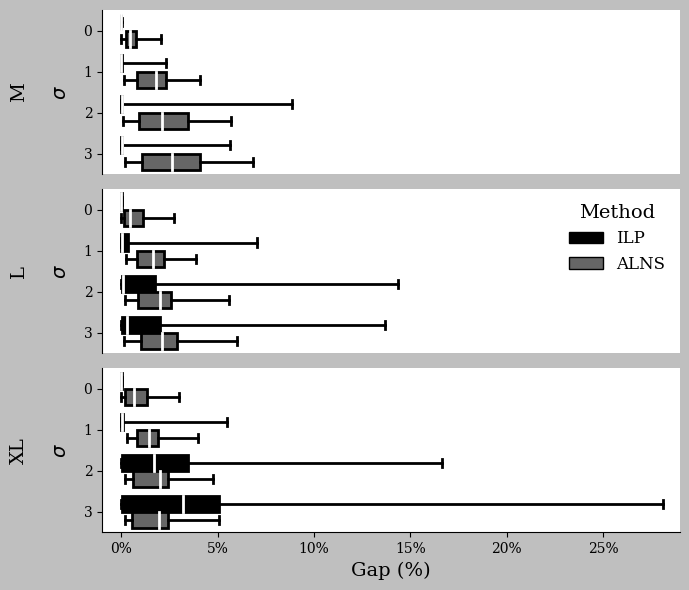

In [13]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(7, 6), sharex=True)

gs = gridspec.GridSpec(3, 1)
axes[0] = plt.subplot(gs[0])
axes[1] = plt.subplot(gs[1])
axes[2] = plt.subplot(gs[2])

for ax, learners, ylabel in zip(axes, [800, 1200, 1600], ["M", "L", "XL"]):
    sns.boxplot(y='progress', x='gap', hue='method', orient='h', data=data[data.learners == learners], ax=ax,  whis=(0, 100), **PROPS)

    if ax is axes[1]:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(title="Method", handles=handles, labels=["ILP", "ALNS"], frameon=False)
    else:
        ax.get_legend().remove()
    
    ax.set_xlim([-1, 29])
    
    for spine in ['right', 'top']:
        ax.spines[spine].set_visible(False)

    if ax is not axes[-1]:
        ax.set_xlabel("")
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
    else:
        ax.set_xlabel("Gap (%)")
        ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
        
    ax.set_ylabel(f"{ylabel}\n\n$\\sigma$", labelpad=10)

fig.align_labels()
plt.tight_layout()
plt.savefig("out/method_gaps.pdf", bbox_inches='tight');

## Heuristic gaps

In [14]:
objectives = pd.DataFrame(index=heuristic.index)

objectives["ilp"] = ilp.objective
objectives["ilp_10_min_gap"] = ilp['gap (10 min)']
objectives["heuristic"] = heuristic.objective
objectives["gap"] = 100 * (ilp.objective - heuristic.objective) / heuristic.objective
objectives["ilp_runtime"] = ilp['run-time (wall)']
objectives["heur_runtime"] = heuristic['run-time (wall)']

grouped = objectives.groupby("experiment")

In [15]:
# Sanity check: the heuristic can never perform better than the optimal
# values for each problem instance.
print(round(min(objectives.gap), 2))  # just to be sure this is >= 0

-0.0


In [16]:
print(f"Average difference (%) between heuristic and ILP objectives: {objectives.gap.mean():.1f}%")
print(f"Maximum of {objectives.gap.max():.1f}% at: {objectives.gap.idxmax()}")
print(f"Worst 10min ILP gap of {objectives.ilp_10_min_gap.max():.1f}% at {objectives.ilp_10_min_gap.idxmax()}") 

Average difference (%) between heuristic and ILP objectives: 1.6%
Maximum of 6.8% at: (43, 63)
Worst 10min ILP gap of 28.1% at (93, 12)


Text(0, 0.5, 'Experiments (#)')

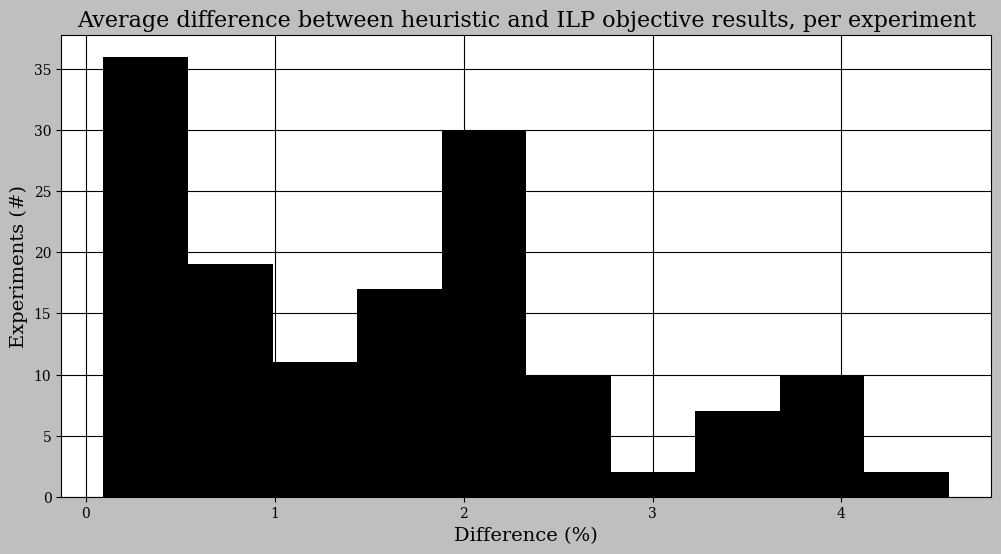

In [17]:
grouped.gap.mean().hist(figsize=(12, 6))
plt.title("Average difference between heuristic and ILP objective results, per experiment")
plt.xlabel("Difference (%)")
plt.ylabel("Experiments (#)")

Text(0, 0.5, 'Experiments (#)')

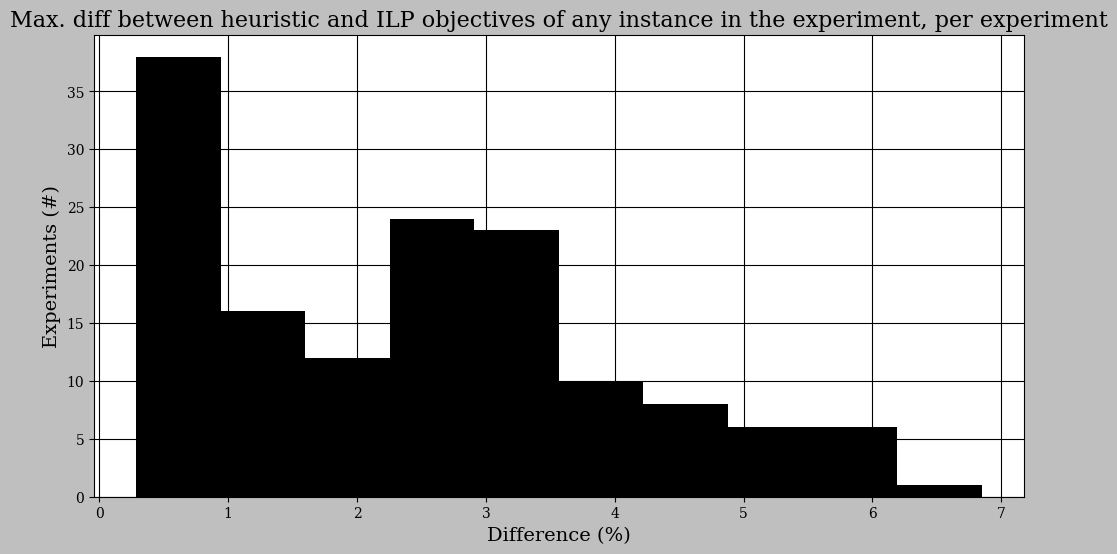

In [18]:
grouped.gap.max().hist(figsize=(12, 6))
plt.title("Max. diff between heuristic and ILP objectives of any instance in the experiment, per experiment")
plt.xlabel("Difference (%)")
plt.ylabel("Experiments (#)")

## Table 4

In [19]:
exp = pd.DataFrame(index=experiments.index)
exp["w"] = experiments.penalty.apply(lambda p: f"{int(100 * p)}%")

exp["sigma"] = experiments.progress.apply(int)

l2s = {800: "M", 1200: "L", 1600: "XL"}
exp["size"] = experiments.learners.apply(lambda l: l2s[l])

exp["split"] = np.where(experiments.split, "Yes", "No")
exp["qualifications"] = experiments.qualifications

print(exp.to_latex())

\begin{tabular}{llrlll}
\toprule
{} &    w &  sigma & size & split &   qualifications \\
experiment &      &        &      &       &                  \\
\midrule
1          &  50\% &      0 &    M &   Yes &        (1, 0, 0) \\
2          &  50\% &      0 &    L &   Yes &        (1, 0, 0) \\
3          &  50\% &      0 &   XL &   Yes &        (1, 0, 0) \\
4          &  75\% &      0 &    M &   Yes &        (1, 0, 0) \\
5          &  75\% &      0 &    L &   Yes &        (1, 0, 0) \\
6          &  75\% &      0 &   XL &   Yes &        (1, 0, 0) \\
7          &  50\% &      1 &    M &   Yes &        (1, 0, 0) \\
8          &  50\% &      1 &    L &   Yes &        (1, 0, 0) \\
9          &  50\% &      1 &   XL &   Yes &        (1, 0, 0) \\
10         &  75\% &      1 &    M &   Yes &        (1, 0, 0) \\
11         &  75\% &      1 &    L &   Yes &        (1, 0, 0) \\
12         &  75\% &      1 &   XL &   Yes &        (1, 0, 0) \\
13         &  50\% &      2 &    M &   Yes &        (1, 0,

## Table 5

In [20]:
# This is used for the results table in the paper.
aggregates = grouped.aggregate({"ilp": "mean", "ilp_runtime": "mean", "ilp_10_min_gap": "mean", "heuristic": "mean", "heur_runtime": "mean", "gap": ["mean", "min", "max"]})
formatters = {("gap", agg): "{:.2f}%".format for agg in ["mean", "min", "max"]}
formatters[("ilp_10_min_gap", "mean")] = "{:.2f}%".format
formatters[("ilp_runtime", "mean")] = "{:.0f}".format
formatters[("heur_runtime", "mean")] = "{:.0f}".format

# For in the appendix
print(aggregates.to_latex(longtable=True, label="tab:heuristic_performance", formatters=formatters))

\begin{longtable}{lrrrrrrrr}
\label{tab:heuristic_performance}\\
\toprule
{} &     ilp & ilp\_runtime & ilp\_10\_min\_gap & heuristic & heur\_runtime & \multicolumn{3}{l}{gap} \\
{} &    mean &        mean &           mean &      mean &         mean &  mean &    min &   max \\
experiment &         &             &                &           &              &       &        &       \\
\midrule
\endfirsthead

\toprule
{} &     ilp & ilp\_runtime & ilp\_10\_min\_gap & heuristic & heur\_runtime & \multicolumn{3}{l}{gap} \\
{} &    mean &        mean &           mean &      mean &         mean &  mean &    min &   max \\
experiment &         &             &                &           &              &       &        &       \\
\midrule
\endhead
\midrule
\multicolumn{9}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
1          & 4798.63 &          30 &          0.00\% &   4764.85 &          113 & 0.71\% &  0.39\% & 1.40\% \\
2          & 7345.85 &          63 &     